# Titanic - Machine Learning from Disaster

We are given the dataset of the passengers aboard the infamous Titanic in the form of one training set and other test dataset. 

<br>

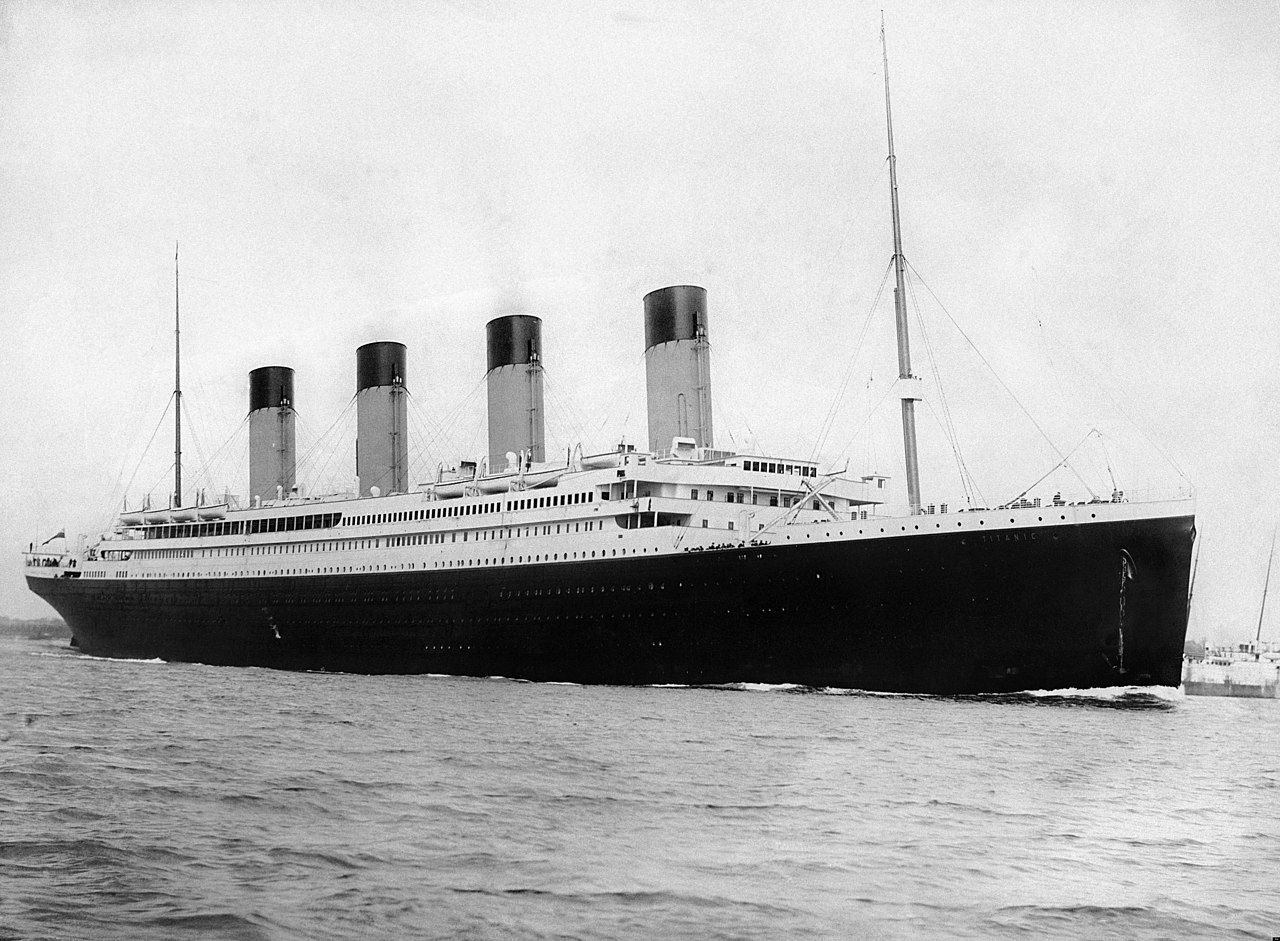

<br>

To start working, **_let's first import required libaries!_** 

<br>

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn as sk


<br>

Did the previous task? Now, We must load the test and training data shouldn't we? Note that the "Survived" column was just added to make the latter function work.

<br>

In [2]:
# importing the training and testing datasets

trset = pd.read_csv("../data/train.csv") #training
teset = pd.read_csv("../data/test.csv")  #testing

teset["Survived"] = pd.DataFrame(np.zeros(int(418)), columns = ["Survived"])
trset.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<br>

We know that, to train any ML model, we need to pre-process data. Let's get into it! But wait! What needs to pre-processed in the data? Observe the train.csv file and you will see that some age fields are empty, while some ages are empty values, also note that gender is a string!

<br>

In [3]:
#Pre-processing data

def pre_process(dataset):
    X_train = dataset[["Pclass", "Sex", "SibSp", "Parch"]]
    Y_train = dataset["Survived"]
    
    #Labelling Sex as 0 or 1
    lenc = sk.preprocessing.LabelEncoder()
    X_train = X_train.apply(lenc.fit_transform)
    
    # Processing float ages to int and NaN (empty fields) to mean age value
    age = dataset.Age.fillna(float(0)).values
    age = age.astype(int)

    from sklearn.impute import SimpleImputer as simp


    mean_imp = simp(missing_values=0, strategy='mean')

    age = age.reshape(-1, 1)
    mean_imp.fit(age)
    age = mean_imp.transform(age)
    age = age.astype(int)
    age = pd.DataFrame(age, columns=["Age"])
    X_train["Age"] = age
    
    return (X_train, Y_train)


<br>

## Using Random Forest Classifier
Having built the preprocessor function let's preprocess the training data and then put it in the Random Forest Classifier model. As the dataset is small, the model gets trained instantaneously!

<br>

In [4]:
# training the RFC model

from sklearn.ensemble import RandomForestClassifier as rfc

preprocessed_data = pre_process(trset)
model = rfc(n_estimators=600, max_leaf_nodes=20, n_jobs=-1)
model.fit(preprocessed_data[0], preprocessed_data[1])


RandomForestClassifier(max_leaf_nodes=20, n_estimators=600, n_jobs=-1)

<br>

As the model is now ready, let's use the model to predict on the test dataset.

<br>

In [5]:
# Checking the predctions of RFC

test_preprocessed = pre_process(teset)
y_pred = pd.DataFrame(model.predict(test_preprocessed[0]), columns=["Survived"])

teset.Survived = y_pred

rfcPredict = teset[["PassengerId", "Survived"]]
rfcPredict.Survived.value_counts()


0    275
1    143
Name: Survived, dtype: int64

<br>

## Using Gradient Boosting Classifier
Let's use the Gradient Boosting Classifier this time!

In [6]:
# training the GBC model

from sklearn.ensemble import GradientBoostingClassifier as gbc

preprocessed_data = pre_process(trset)
model = gbc(max_depth= 4, n_estimators=5, learning_rate=1.0)
model.fit(preprocessed_data[0], preprocessed_data[1])


GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=5)

<br>

Let's now use the GBC model to predict on the test dataset

<br>

In [7]:
# Checking the predctions of GBC

test_preprocessed = pre_process(teset)
y_pred = pd.DataFrame(model.predict(test_preprocessed[0]), columns= ["Survived"])

teset.Survived = y_pred

gbcPredict = teset[["PassengerId", "Survived"]]
gbcPredict.Survived.value_counts()


0    260
1    158
Name: Survived, dtype: int64

<br>

Let's plot the prediction results of RFC and GBC as a comparison.

<br>

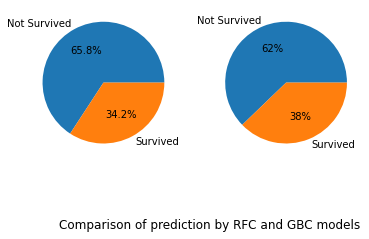

In [8]:
fig, axs = plt.subplots(1,2)

labels = ["Not Survived", "Survived"]

dt1 = rfcPredict.Survived.value_counts()
dt2 = gbcPredict.Survived.value_counts()


axs[0].pie(dt1, labels=labels, autopct='%1.1f%%')
axs[1].pie(dt2, labels=labels, autopct='%.0f%%')

plt.title("Comparison of prediction by RFC and GBC models", y= -0.5, x=0.0)

plt.show()
